# Visualization of Zipf's Law and Corpus Tokens

This program aims to count word occurences in given corpus files and visualize the frequency of the 100 most common words using matplotlib. As a way of comparison, the predictions by Zipf's Law are included as a line plot.

The first part is meant to be reused and therefore consists of generalized functions.

In [1]:
import os
import matplotlib.pyplot as plt
from collections import Counter

In [2]:
def traverse_dir(paths):
    file_paths = [os.path.join(paths, f) for f in os.listdir(paths) 
                  if os.path.isfile(os.path.join(paths, f))]
    
    return file_paths

In [3]:
def tokenize(file_paths):
    tokens = []
    
    for path in file_paths:
        with open(path, "r", encoding="utf-8") as f:
            files_tokens = f.read().split()
            tokens.extend([token.lower().strip(" .:,;-_!?[]()=-+@'*’~´`") for token in files_tokens])
            tokens = list(filter(None, tokens))
            
    return tokens

In [4]:
def find_occurences(tokens):
    occurences = Counter(tokens).most_common(100)
    
    return occurences

In [5]:
def frequencies(tokens, occurences):
    frequency = []
    frequency.extend([round(value/len(tokens), 6) for (key,value) in occurences])
    
    return frequency

In [6]:
file_paths = traverse_dir('../exercise-9/corpus/')
tokens = tokenize(file_paths)
occurences = find_occurences(tokens)
frequency = frequencies(tokens, occurences)

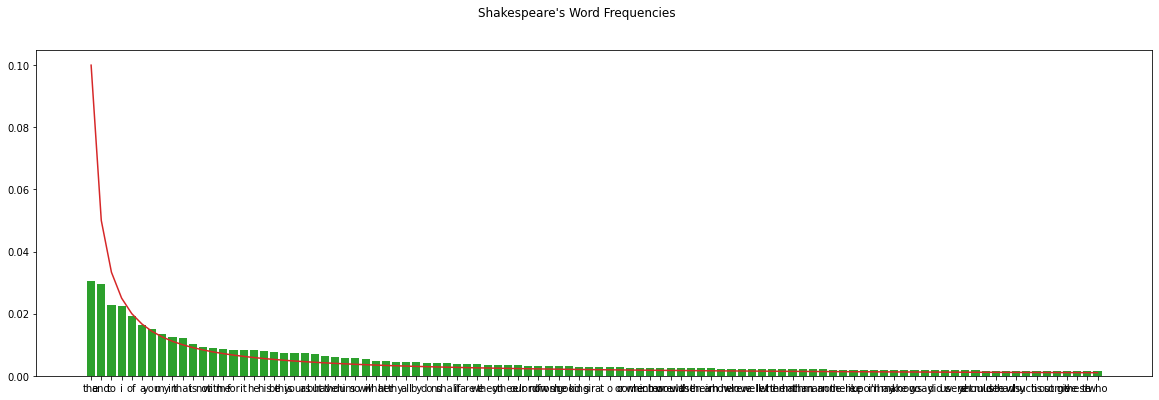

In [7]:
def plots_will(frequency, occurences):
    figure, ax = plt.subplots(1, 1, figsize=(20, 6))
    figure.suptitle("Shakespeare's Word Frequencies")
    
    x = [key for (key, value) in occurences]
    y = frequency
    
    y1 = [(0.1/(i+1)) for i, (key, value) in enumerate(occurences)]
    
    ax.bar(x, y, color="tab:green")
    ax.plot(x, y1, color="tab:red", label="Zipf's Law")
    plt.show()

plots_will(frequency, occurences)

In [8]:
file_paths = traverse_dir('corpus')
tokens = tokenize(file_paths)
occurences = find_occurences(tokens)
frequency = frequencies(tokens, occurences)

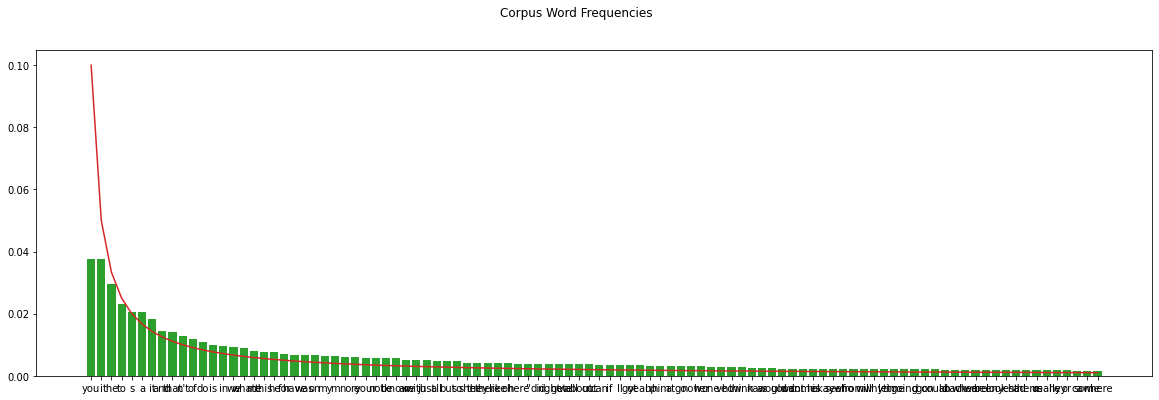

In [9]:
def plots_corpus(frequency, occurences):
    figure, ax = plt.subplots(1, 1, figsize=(20, 6))
    figure.suptitle("Corpus Word Frequencies")
    
    x = [key for (key, value) in occurences]
    y = frequency
    
    y1 = [(0.1/(i+1)) for i, (key, value) in enumerate(occurences)]
    
    ax.bar(x, y, color="tab:green")
    ax.plot(x, y1, color="tab:red", label="Zipf's Law")
    plt.show()

plots_corpus(frequency, occurences)

Zipf's Law is a heuristic aproach to language via statistics. But, language doesn't obey the rules of math.

Most explanations of this law begin by saying, that the second most common word shows half the frequency of the first. In these two particular cases this is obviously not true. 
The much smaller corpus of Shakespeare aligns with Zipf's Law at the fourth and fifth most common word, while the bigger corpus reaches this point at the third and fourth word. Both of them differ vastly shortly after.

These findings might suggest that Zipf's Law has some truth to it, while it is impossible to predict language using simple calculations. 